# Sampling quantum states
Sampling single mode quantum states for use in quantum phase space simulations using the truncated Wigner and +P distributions. Similar methods can be applied to multimode simulations of Bose-Einstein condensates.

We use the methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033)

with erratum [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

A complete erratum can be found at [SciPost](https://scipost.org/commentaries/10.1016/j.optcom.2009.06.033/).

We have since add sampling for the additional distributions:
- fock state for +W
- thermal state for +P
- Bogoliubov states for P,Q,W


For more information on Bose-Einstein condensate applications, see the review 

___Dynamics and statistical mechanics of ultra-cold Bose gases using c-field techniques___, P. B. Blakie, A. S. Bradley, M. J. Davis, R. J. Ballagh, and C. W. Gardiner, [Advances in Phyiscs 57, 363 (2008)](http://dx.doi.org/10.1080/00018730802564254)



In [ ]:
using PhaseSpaceTools, Plots, LaTeXStrings
gr(size=(250,250),xlabel=L"\alpha_r",ylabel=L"\alpha_i",
    xlims=(-20,20),ylims=(-20,20),ms=.2,
    legend=false,grid=false,aspect_ratio=1,colorbar=true)

In [3]:
function showmeansW(a,ā)
    n̄ = mean(a.*ā)-.5
    Vn= mean(a.^2 .*ā.^2)-mean(a.*ā)-n̄.^2
    println(" ")
    println("N = $N samples.")
    println(" ")
    println("Averages")
    println("<â> = ", mean(a))
    println("<â⁺â> = ",n̄)
    println("V(n̂) = ",Vn)
    println("Relative number variance = ",sqrt(abs(Vn))/abs(n̄))
end

showmeansW (generic function with 1 method)

In [3]:
?wigner

search: wigner



```
a,ā = wigner(state <: State,N)
```

Generate `N` samples from wigner phase-space distribution for `state`.

Implemented states are

  * `Coherent(α)`
  * `Thermal(α,n̄)`
  * `Squeezed(α,ϵ)`
  * `Crescent(α,ϵ,q)`
  * `Fock(n)`
  * `Bogoliubov(u,v,n̄)`

Moments of the Wigner distribution generate quantum operator averages that are symmetrically ordered.


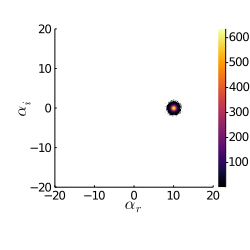

In [2]:
b = 10
N = 100000
state = Coherent(b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [4]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 10.00395084013214 + 0.001142012982332709im
<â⁺â> = 100.07934504928284 + 0.0im
V(n̂) = 99.73934716791337 + 0.0im
Relative number variance = 0.09979040979838884


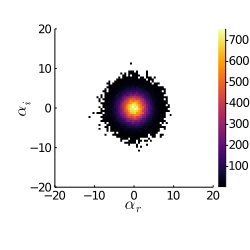

In [5]:
b = 10
N = 100000
state = Thermal(0,b)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [6]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 0.005011824069692648 + 0.0038161833627363005im
<â⁺â> = 9.97018012114986 + 0.0im
V(n̂) = 108.0556801625482 + 0.0im
Relative number variance = 1.04260738391654


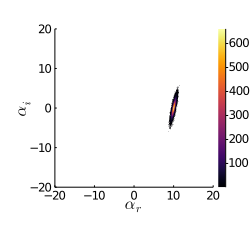

In [7]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = wigner(state,N)
histogram2d(real(a),imag(a))

In [8]:
showmeansW(a,ā)

 
N = 100000 samples.
 
Averages
<â> = 10.000412986329126 + 0.0041272667075535245im
<â⁺â> = 101.40389835060552 + 0.0im
V(n̂) = 48.32267024934845 + 0.0im
Relative number variance = 0.06855210754900502


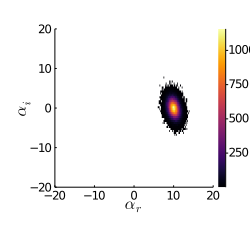

In [9]:
β = 10
ϕ = π/16
r = 1
ϵ = r*exp(2*im*ϕ)
N = 100000
state = Squeezed(β,ϵ)
a,ā = positiveP(state,N)
histogram2d(real(a),imag(a))

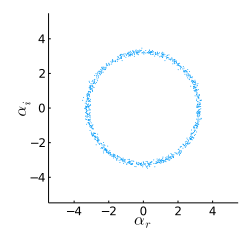

In [10]:
n = 10
N = 1000
state = Fock(n)
a,ā = wigner(state,N)
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [11]:
N=10000
a,ā = wigner(state,N)
showmeansW(a,ā)

 
N = 10000 samples.
 
Averages
<â> = -0.029035999947681922 - 0.0036306510802428874im
<â⁺â> = 10.006569501926197 + 0.0im
V(n̂) = -0.0024335171529799027 + 0.0im
Relative number variance = 0.004929830526392815


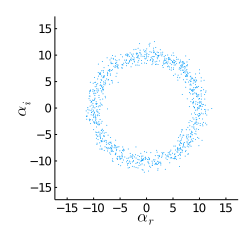

In [12]:
n = 100
N = 1000
state = Fock(n)
a,ā = positiveP(state,N)
 
scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [13]:
N = 10000;
a,ā = positiveP(state,N)

(Complex{Float64}[4.470560817720653 - 8.984722049888145im, -4.108408517869998 - 8.197470106991892im, 1.1508168652475796 + 8.839012164709615im, 10.752492464491185 + 2.5983548600684845im, 6.755999566893274 + 5.433179369754381im, 6.228552379449871 + 7.625358605643262im, -5.783718091966346 - 8.855119630683712im, -10.94877784747982 + 0.1590339875546939im, -4.939350905391668 - 6.409907966939839im, 5.548366858489428 - 8.396557723515624im  …  8.926014692088724 - 3.6926011449945313im, -10.435290669030307 - 0.802259141213709im, 7.761810537508712 - 7.517015530831983im, 9.142821283976884 + 3.82126297484908im, -10.06602382666464 + 2.900868872059574im, 4.230351765089122 + 8.560937226232381im, -7.745154625920973 - 5.404283155331867im, 7.254365830510489 - 7.118228109722496im, 9.663157690991689 - 4.023513886215003im, 9.555357031592202 + 3.878823195158925im], Complex{Float64}[6.198352195807297 + 8.302878771650402im, -5.640503495038212 + 7.914118229025535im, 3.416819432450494 - 9.07693945233068im, 9.2016

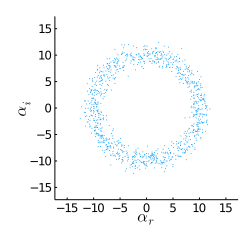

In [14]:
n = 100
N = 1000
a,ā = positiveW(state,N)

scatter(real(a),imag(a))
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [15]:
N = 100000;
a,ā = positiveP(state,N)
# showmeansP(a,ā)

(Complex{Float64}[-8.762786435456754 + 4.691720817104896im, 8.676761717686993 - 5.466770475982911im, 7.898224385326772 + 5.645987313843931im, -9.850020165322839 + 7.087119404872852im, 10.202172008616298 - 3.6962505602197315im, -9.06896631324618 + 5.277804336244839im, -7.0194967091321505 - 6.493726832347958im, 10.043598121135833 + 2.2337692421403035im, -5.477625666461565 + 7.052186318376276im, 8.833786641304162 + 2.700097659570984im  …  10.285191529525973 - 4.330430779226301im, -9.780379698441548 - 5.031760075443854im, -12.002249190578754 - 2.8190830155868243im, -6.712892029393264 - 9.149779066944655im, 7.241202885133985 + 7.658773675213883im, 2.4993805912347393 - 10.294588266474875im, 8.123855467024187 + 1.1787727218149409im, 8.890980188479437 + 1.5809896316862564im, 10.066404289968753 + 0.5521641979921538im, 1.2200758541728345 - 10.43700928659671im], Complex{Float64}[-7.155908222319156 - 5.763989719965524im, 8.536357600860459 + 3.90726080764253im, 7.661234993400788 - 7.43320901332963i

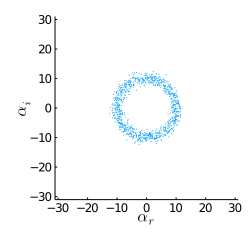

In [16]:
#for n>320 uses asymptotic expansion
n=321
state = Fock(n)
N=1000
a,ā = positiveW(state,N)
am = sqrt(3n);xlims!(-am,am);ylims!(-am,am)

In [17]:
N = 100000;
a,ā = positiveP(state,N)
# showmeansP(n,N,a,ā)

(Complex{Float64}[12.010881447006032 - 14.637839546014336im, -14.448043243875423 - 10.927329156822im, -13.051039218973886 - 13.850546656982393im, 4.843314873324304 - 18.770800609069454im, -17.903393238689198 + 1.0619972384870848im, -15.73292812944109 - 8.881249322433472im, -15.813089155309125 + 10.24605785586247im, 7.9964064581545875 + 14.919073795669169im, 12.794614737978796 + 13.082952590297312im, -12.921509774850303 + 12.59514895975865im  …  -0.46400253333661745 + 18.710163645184505im, 18.775519044915487 + 5.087604749698479im, -17.231188811215244 - 4.213348362430516im, -17.609672991226336 - 4.286334674965579im, -0.9110910690167295 + 20.04353009034789im, -1.0646565498499552 - 18.573411919177424im, -15.494764004226928 + 8.390073088288592im, 17.876016291882234 - 2.556742127334068im, 17.259459198795103 - 0.8174246201475945im, 12.060791757140821 - 11.83351854088455im], Complex{Float64}[13.354666370393243 + 11.597991417964776im, -15.707946438951867 + 10.074244785530356im, -14.401883694783

In [18]:
#push n and N
n=10000
state = Fock(n)
N=100000
a,ā = positiveW(state,N)
# averages(n,N,a,ā)

(Complex{Float64}[-43.14584010301094 - 91.22241859142048im, -35.04283914059731 + 91.88233846007483im, 66.78478496609564 + 75.13227595190101im, -92.48258587072564 - 36.10260938356935im, -54.59485603910687 + 83.26047418331113im, 73.6870461486533 + 66.62234100836926im, -63.36958120938921 + 74.8226899194396im, 82.13800897988654 - 56.03690285151013im, -84.51980295695762 - 54.83335214523445im, 71.95223388283209 + 70.02081350978388im  …  98.3259527972487 + 11.095771037295995im, -67.01117148643148 + 74.43222974724785im, 87.33875490465644 - 47.30958271239759im, 28.22469070379385 + 95.59087336006925im, -86.95145340833103 - 46.300660621668904im, 97.43730909970152 + 17.18216638986923im, -97.85543610891129 - 17.066572784177946im, 69.17437199140531 + 72.9685823756394im, -49.493661405191155 + 85.49688621254585im, -89.39061820658056 + 45.96295724021105im], Complex{Float64}[-44.11117641041095 + 90.2541313332957im, -34.94467947914222 - 93.96770784797374im, 67.03913527121007 - 75.51134540574911im, -92.62

In [20]:
?Crescent

search: Crescent CartesianIndices



```
Crescent(β,ϵ,q)
```

Create a Cresecent state with parameters `β`, `ϵ`, `q`.


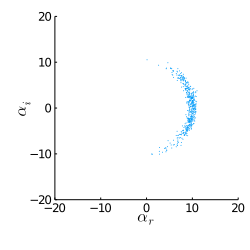

In [21]:
β = 10
ϵ = 0
q = .5
N = 500
state = Crescent(β,ϵ,q)
a,ā = wigner(state,N)
scatter(real(a),imag(a))

not quite the right moments for crescent state, but a sanity check of sorts:

In [22]:
mean(a.*ā)-.5, sinh(abs(ϵ)).^2+abs2(β)

(99.88036862916769 + 0.0im, 100.0)

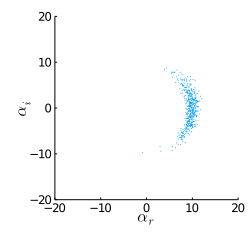

In [23]:
β = 10
ϵ = 0
q = .4
N = 500
state = Crescent(β,ϵ,q)
a,ā = husimiQ(state,N)
scatter(real(a),imag(a))

In [24]:
mean(a.*ā)-1,sinh(abs(ϵ)).^2+abs2(β) 

(99.97575694160716 + 0.0im, 100.0)

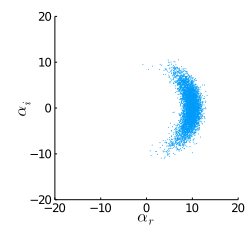

In [25]:
β = 10
ϵ = 0
q = .4
N = 5000
state = Crescent(β,ϵ,q)
a,ā = positiveP(state,N)
scatter(real(a),imag(a))

In [26]:
mean(a.*ā),sinh(abs(ϵ)).^2+abs2(β)

(100.01072406089338 - 0.19827609677479646im, 100.0)